In [26]:
#TASK 1

!pip install scipy
import numpy as np
import scipy.stats as sc
x=sc.uniform.rvs(size=[100, 2])

assert x.shape == (100, 2), "Wrong shape"
assert x.min() >= 0 and x.max() <= 1, "Wrong range"
assert np.abs(x.mean() - 0.5) < 8e-2, "Wrong distribution or bad luck"
x.mean()

mean_by_row = np.mean(x, axis=1)
mean_by_col = np.mean(x, axis=0)
mean_total = np.mean(x)

assert mean_by_row.shape == (100, )
assert mean_by_col.shape == (2, )
assert mean_total.shape == ()

print("The total mean is {:.3f}".format(mean_total))

The total mean is 0.495


In [27]:
#TASK 2
import random
import numpy as np
from collections import Counter
from numpy import ndarray

def t(pep):
  return pep[0]

y = [random.randrange(0, 4, 1) for i in range (100)]
y=np.array(y)
assert y.shape == (100,)

basic_counter = Counter(y)
container_A = dict(basic_counter)
container_B = list(basic_counter.items())
container_C = np.array(container_B)
print(container_A, container_B, container_C)

{3: 25, 0: 21, 2: 22, 1: 32} [(3, 25), (0, 21), (2, 22), (1, 32)] [[ 3 25]
 [ 0 21]
 [ 2 22]
 [ 1 32]]


The type of container_A - dictionary, container_B - list The type of the elements of container_C - numpy array



In [28]:
counter_values = np.array(sorted(container_C, key=t))

assert list(counter_values[:, 0]) == [0, 1, 2, 3], "Error: Wrong order"
assert min([container_A[x[0]] == x[1] for x in counter_values]), "Error: Count values shuffled"
print("Great!")

Great!


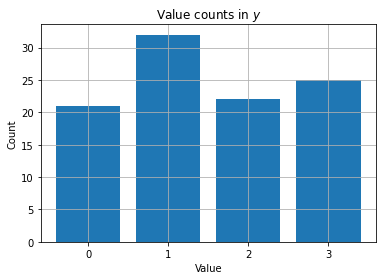

In [29]:
#Task 3
import matplotlib.pyplot as plt
plt.title("Value counts in $y$")
plt.bar(counter_values[:, 0], counter_values[:, 1])
plt.xticks(counter_values[:, 0])
plt.xlabel("Value")
plt.ylabel("Count")
plt.grid(10)
plt.show()

In [30]:
#Task 4
z = np.concatenate((x, np.array([y]).T), axis=1)
assert z.shape == (100, 3) and np.equal(z[:, :2], x).all() and np.equal(z[:, -1], y).all()
print("OK")

OK


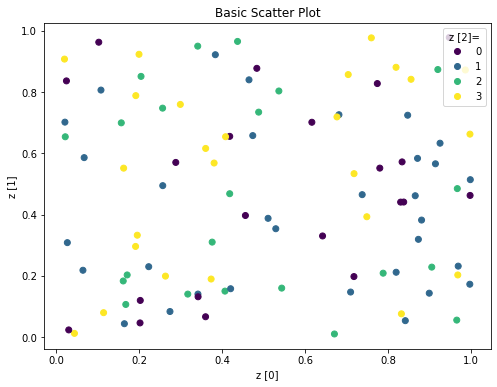

In [31]:
#Task 5
plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")
scatter=plt.scatter(z[:, 0], z[:, 1], c=z[:, 2], label=["Label-1" , "Label-2", "uuu", "hhh"])
plt.xlabel("z [0]")
plt.ylabel("z [1]")
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3], loc="upper right", title='z [2]=')
plt.show()

In [32]:
#Task 2.1
import pandas as pd
coords_db = pd.read_csv(r"C:\Users\Sharlotte\Desktop\moscow_coords.csv")
print (coords_db.head(10))
print(type(coords_db))
print(coords_db.shape)
print(coords_db.columns)
print(type(coords_db["ADDRESS"]))
def tokenize_address(input_string):
    new_str = input_string.lower()
    new_str = new_str.replace(',', '')
    new_str = new_str.replace('.', '')
    new_str = new_str.split(' ')
    return new_str
assert tokenize_address("A, b. C, and d?") == ["a", "b", "c", "and", "d?"], "Something is wrong"

def count_a_token(token_list, lookup_token):
    return token_list.count(lookup_token)

test_address = "город Москва, улица Космонавта Волкова, дом 10."
tokens = tokenize_address(test_address)
print(tokens)
print(count_a_token(tokens, "город"))

assert tokens == ["город", "москва", "улица", "космонавта", "волкова", "дом", "10"]
assert count_a_token(tokens, "город") == 1
print("Seems fine!")
coords_db.loc[:, "city_token_cnt"] = coords_db["ADDRESS"].apply(lambda x: count_a_token(tokenize_address(x), "город"))
print (coords_db.head())
stats = coords_db.groupby("city_token_cnt").count()
print (stats)

                                             ADDRESS     coor_x     coor_y
0  город Москва, Варшавское шоссе, дом 150, строе...  37.601252  55.599249
1             город Москва, Косинская улица, дом 26А  37.828115  55.717493
2         город Москва, Гороховский переулок, дом 21  37.668093  55.766224
3  город Москва, Тагильская улица, дом 4, строени...  37.752887  55.818257
4  город Москва, Ленинградский проспект, дом 73А,...  37.513546  55.803510
5             город Москва, улица Вострухина, дом 5А  37.797659  55.720022
6  город Москва, улица Космонавта Волкова, дом 10...  37.514713  55.815373
7  город Москва, Балтийская улица, дом 8, строени...  37.517288  55.809580
8    город Москва, улица Головачёва, дом 3, корпус 2  37.805437  55.675219
9  город Москва, Климентовский переулок, дом 1, с...  37.631972  55.740967
<class 'pandas.core.frame.DataFrame'>
(406934, 3)
Index(['ADDRESS', 'coor_x', 'coor_y'], dtype='object')
<class 'pandas.core.series.Series'>
['город', 'москва', 'улица', 'косм

11083 addresses have token город two times or more

In [33]:
#Task 2.2

def get_n_grams(input_tokens, n):
    cnt=len(input_tokens)
    new_array=[]
    tmp=[input_tokens[i] for i in range (n)]
    new_array.append(tmp)
    for i in range (n, cnt):
        tmp=tmp[1::]
        tmp.append(input_tokens[i])
        new_array.append(tmp)
    return new_array
    
assert get_n_grams(["a", "b", "c", "d"], 1) ==  [['a'], ['b'], ['c'], ['d']]
assert get_n_grams(["a", "b", "c", "d"], 2) ==  [['a', 'b'], ['b', 'c'], ['c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 3) ==  [['a', 'b', 'c'], ['b', 'c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 4) ==  [['a', 'b', 'c', 'd']]

print("OK, seems fine!")

def filter_n_grams(n_grams, lookup_token):
    new_array=[]
    for i in range (len(n_grams)):
        if (n_grams[i][0]==lookup_token):
            new_array.append(n_grams[:][i])
    return new_array

assert filter_n_grams([
    ["a", "b"], 
    ["a", "c"],
    ["b", "d"],
    ["d", "a"]
    ], 
    "a") == [["a", "b"], ["a", "c"]] 

print("Seems fine!")

sub_db = coords_db[coords_db['city_token_cnt']>=2]
print (sub_db.head(5))
counter_dict = {}
for address in sub_db["ADDRESS"]:
    tokens = tokenize_address(address)
    n_grams = get_n_grams(tokens, 2)
    filtered_n_grams = filter_n_grams(n_grams,  'город')
    for x in filtered_n_grams:
        key = x[0]+' '+x[1]
        counter_dict[key] = 1 if key not in counter_dict else counter_dict[key] + 1
counter_dict

OK, seems fine!
Seems fine!
                                         ADDRESS     coor_x     coor_y  \
40   город Москва, город Зеленоград, корпус 1212  37.193861  55.992106   
193  город Москва, город Зеленоград, корпус 1459  37.162394  55.984514   
220  город Москва, город Зеленоград, корпус 1215  37.190049  55.994432   
282  город Москва, город Зеленоград, корпус 1110  37.188728  55.999289   
363   город Москва, город Зеленоград, корпус 115  37.204655  56.008116   

     city_token_cnt  
40                2  
193               2  
220               2  
282               2  
363               2  


{'город москва': 11083,
 'город зеленоград': 3579,
 'город московский': 1351,
 'город троицк': 4193,
 'город щербинка': 1959,
 'город зеленогра': 1}

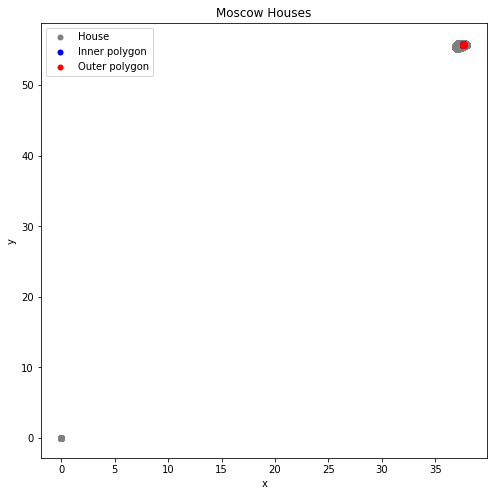

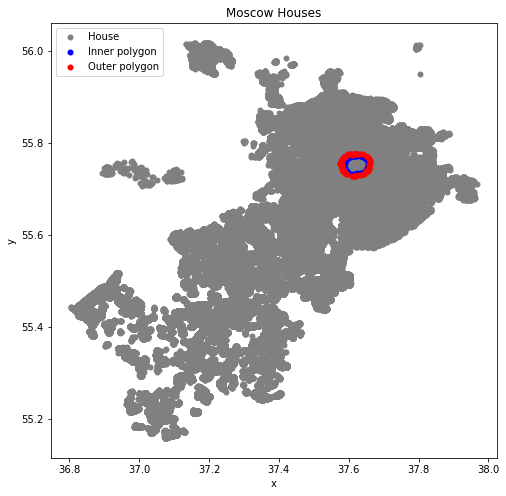

[[37.66809323 55.76622383]
 [37.63197249 55.74096735]
 [37.59357644 55.74089325]
 ...
 [37.63030826 55.70983699]
 [37.57126822 55.71697194]
 [37.58365603 55.74144917]]


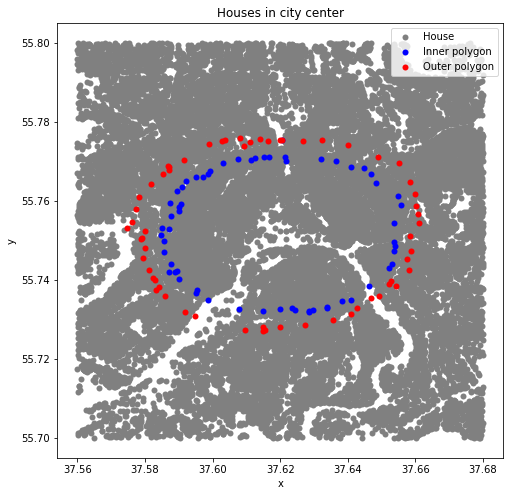

In [34]:
#Task 2.3

inner_poly = pd.read_csv(r"C:\Users\Sharlotte\Desktop\inner_poly.csv", header=None).values
outer_poly = pd.read_csv(r"C:\Users\Sharlotte\Desktop\outer_poly.csv", header=None).values
house_points = coords_db[["coor_x", "coor_y"]].values

plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0],house_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["House" , "Inner polygon", "Outer polygon"])
plt.show()

house_points=np.array([x for x in house_points if (x[0]>2 and x[1]>2)])

plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0], house_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["House" , "Inner polygon", "Outer polygon"])
plt.show()


lower_x = 37.56
upper_x = 37.68
lower_y = 55.70
upper_y = 55.80

def filter_points_by_square(input_array, lower_x, upper_x, lower_y, upper_y):
    new_array=[]
    for p in house_points:
        if (p[0]<=upper_x and p[0]>=lower_x and p[1]<=upper_y and p[1]>=lower_y):
            new_array.append(p)
    return np.array(new_array)

small_square_points = filter_points_by_square(house_points, lower_x, upper_x, lower_y, upper_y)
plt.figure(figsize=(8, 8))
plt.title("Houses in city center")
print (small_square_points)
plt.scatter(small_square_points[:, 0], small_square_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["House" , "Inner polygon", "Outer polygon"])
plt.show()

The scale of the drawing is dictated by the diameter of the set. Due to the points
which are very different from others (outliers), the scale of the plot is too large. The diameter of the set of correct coordinates is much smaller than the scale of this plot, so they collapse into a point. To fix this, we need to remove outliers

Task 4 I decided to implement the following algorithm: firstly I build the convex polygon and then traverse counterclockwise along all its edges and for each of them check whether the point is to the left or to the right of this edge (I consider the cross product). If at least one point is on the right, then False is returned; otherwise, True.
<br>
It works, because our polygon is convex. The points of a convex polygon are on the same side of each edge (the property of a convex polygon). In the case of our chosen traversal, the points of the polygon will always be to the left of each edge (the points of the edges will be to the left of each, except the one on which they are).


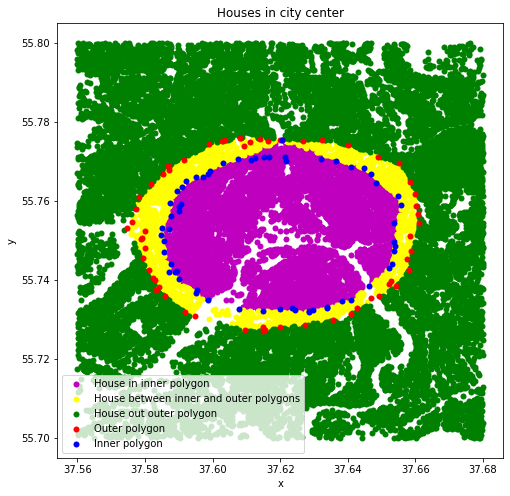

(2520, 2)


In [35]:
from math import *
def dist (a, b):
    return sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

def build_polygon (points):
    p0=points[0]
    for p in points:
        if (p[0]<p0[0] or (p[0]==p0[0] and p[1]<p0[1])):
            p0=p
    temp=p0
    hull=[]
    nex=points[0]
    hull.append(p0)
    while (True):
        nex=points[0]
        for p in points:
            if ((nex[0]-temp[0])*(p[1]-temp[1])-(nex[1]-temp[1])*(p[0]-temp[0]) < 0):
                nex=p 
            elif ((nex[0]-temp[0])*(p[1]-temp[1])-(nex[1]-temp[1])*(p[0]-temp[0])==0):
                if (dist(p, temp)>dist(nex, temp) and
                   (nex[0]-temp[0])*(p[0]-temp[0])+(nex[1]-temp[1])*(p[1]-temp[1]) >= 0):
                    nex=p                    
        if (nex[0]==p0[0] and nex[1]==p0[1]):
            break
        temp=nex
        hull.append (nex)
    return np.array(hull)

def point_is_inside(point, polygon_points):
    prev=polygon_points[0]
    temp=polygon_points[1]
    for i in range (1, len(polygon_points)):
        temp=polygon_points[i]
        if (temp[0]==polygon_points[0][0] and temp[1]==polygon_points[0][1]):
            break
        if ( (temp[0]-prev[0])*(point[1]-prev[1]) - (temp[1]-prev[1])*(point[0]-prev[0]) < 0):
            return False
        prev=temp
    if ( (polygon_points[0][0]-polygon_points[-1][0])*(point[1]-polygon_points[-1][1]) - 
        (polygon_points[0][1]-polygon_points[-1][1])*(point[0]-polygon_points[-1][0]) < 0):
        return False
    return True

inner_hull=build_polygon(inner_poly)
points_in_poly=[]
for p in small_square_points:
    if (point_is_inside(p, inner_hull)):
        points_in_poly.append(p)
points_in_poly=np.array(points_in_poly)

outer_hull=build_polygon (outer_poly)
points_between_poly=[]
for p in small_square_points:
    if (not point_is_inside(p, inner_hull) and point_is_inside(p, outer_hull)):
        points_between_poly.append(p)
points_between_poly=np.array(points_between_poly)

points_out_poly=[]
for p in small_square_points:
    if ( not point_is_inside(p, outer_hull)):
        points_out_poly.append(p)   
points_out_poly=np.array(points_out_poly)    

plt.figure(figsize=(8, 8))
plt.title("Houses in city center")
plt.scatter(points_in_poly[:, 0], points_in_poly[:, 1], linewidths=0.001, c="m")
plt.scatter(points_between_poly[:, 0], points_between_poly[:, 1], linewidths=0.001, c="yellow")
plt.scatter(points_out_poly[:, 0],points_out_poly[:, 1], linewidths=0.001, c="g")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["House in inner polygon" ,  "House between inner and outer polygons", 
            "House out outer polygon",
            "Outer polygon", "Inner polygon"])
plt.show()

print (points_between_poly.shape)


2520 points are between inner and outer polys

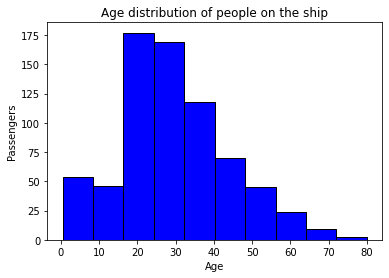

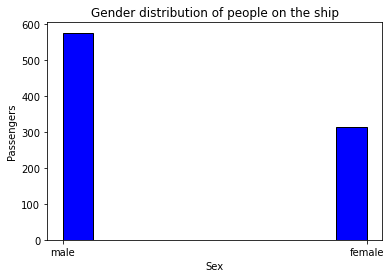

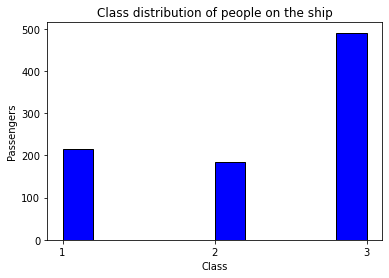

Age distribution mean:  29.69911764705882
Gender distribution mod:  male
Class distribution mod:  3 

Passangers are at age less than 18 years 113
Passangers are at age between 18 and 35 years 340
Passangers are at age between 35 and 60 years 191
Passangers are at age greater than 60 22 

Passenger belonging to each gender group: 
 male      577
female    314
Name: Sex, dtype: int64
Passenger belonging to each class group: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64 

The youngest passager in first class 0.92
The youngest passager in second class 0.67
The youngest passager in third class 0.42 

The oldest passager in first class 80.0
The oldest passager in second class 70.0
The oldest passager in third class 74.0 



In [36]:
#Task 3.1
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statistics

passengers_record = pd.read_csv(r"C:\Users\Sharlotte\Desktop\passengers_record.csv")
survival_info = pd.read_csv(r"C:\Users\Sharlotte\Desktop\survival_info.csv")
assert passengers_record.shape == (891, 11) and survival_info.shape == (891, 2), "Wrong db shapes"
db = pd.merge (passengers_record, survival_info, left_on='PassengerId', right_on='PassengerId')

ax = plt.subplot(1, 1, 1)
ax.hist(db['Age'], color = 'blue', edgecolor = 'black')
ax.set_title('Age distribution of people on the ship')
ax.set_xlabel('Age', size = 10)
ax.set_ylabel('Passengers', size= 10)
plt.show()

ax = plt.subplot(1, 1, 1)
ax.hist(db['Sex'], color = 'blue', edgecolor = 'black')
ax.set_title('Gender distribution of people on the ship')
ax.set_xlabel('Sex', size = 10)
ax.set_ylabel('Passengers', size= 10)
plt.show()

ax = plt.subplot(1, 1, 1)
ax.hist(db['Pclass'], color = 'blue', edgecolor = 'black')
ax.set_title('Class distribution of people on the ship')
ax.set_xlabel('Class', size = 10)
ax.set_ylabel('Passengers', size= 10)
ax.set_xticks([1, 2, 3])
plt.show()

print ('Age distribution mean: ', db['Age'].mean()) 
print ('Gender distribution mod: ', db['Sex'].mode().iloc[0])
#So we find that male the most common Sex in our data
print ('Class distribution mod: ', db['Pclass'].mode().iloc[0], '\n')
#So we find that 3 the most common class in our data

print ('Passangers are at age less than 18 years', db[db['Age']<18].shape[0])
print ('Passangers are at age between 18 and 35 years',db[ (db['Age']>18) & (db['Age']<35)].shape[0])
print ('Passangers are at age between 35 and 60 years', db[ (db['Age']>35) & (db['Age']<60)].shape[0])
print ('Passangers are at age greater than 60', db[ (db['Age']>60)].shape[0], '\n')

print('Passenger belonging to each gender group:', '\n', db['Sex'].value_counts())
print('Passenger belonging to each class group:', '\n', db['Pclass'].value_counts(), '\n')

db = pd.merge(passengers_record, survival_info, left_on='PassengerId', right_on='PassengerId')
x=db[db['Pclass']==1]['Age'].idxmin()
print ('The youngest passager in first class', db[x:x+1]['Age'].iloc[0])
x=db[db['Pclass']==2]['Age'].idxmin()
print ('The youngest passager in second class',db[x:x+1]['Age'].iloc[0])
x=db[db['Pclass']==3]['Age'].idxmin()
print ('The youngest passager in third class', db[x:x+1]['Age'].iloc[0], '\n')

x=db[db['Pclass']==1]['Age'].idxmax()
print ('The oldest passager in first class', db[x:x+1]['Age'].iloc[0])
x=db[db['Pclass']==2]['Age'].idxmax()
print ('The oldest passager in second class', db[x:x+1]['Age'].iloc[0])
x=db[db['Pclass']==3]['Age'].idxmax()
print ('The oldest passager in third class', db[x:x+1]['Age'].iloc[0], '\n')


In [37]:
print ('Survival rates in classes')

surv=db[ (db['Pclass']==1) & (db['Survived']==1 )].shape[0]
al=db[ (db['Pclass']==1)].shape[0]
rate1=surv/al
print ('The first:', rate1)

surv=db[ (db['Pclass']==2) & (db['Survived']==1 )].shape[0]
al=db[ (db['Pclass']==2)].shape[0]
rate2=surv/al
print ('The second: ', rate2)

surv=db[ (db['Pclass']==3) & (db['Survived']==1 )].shape[0]
al=db[ (db['Pclass']==3)].shape[0]
rate3=surv/al
print ('The third: ', rate3, '\n')

print ('Survival rates in gender groups')
       
surv=db[ (db['Sex']=='male') & (db['Survived']==1 )].shape[0]
al=db[ (db['Sex']=='male')].shape[0]
rate=surv/al
print ('Male: ', rate)

surv=db[ (db['Sex']=='female') & (db['Survived']==1 )].shape[0]
al=db[ (db['Sex']=='female')].shape[0]
rate=surv/al
print ('Female: ', rate, '\n')
       
print ('Survival rates in age groups')

surv=db[ (db['Age']<18) & (db['Survived']==1 )].shape[0]
al=db[ (db['Age']<18)].shape[0]
rate=surv/al
print ('Passengers are at age less than 18 years: ', rate)

surv=db[ (db['Age']>18) & (db['Age']<35) & (db['Survived']==1 )].shape[0]
al=db[ (db['Age']>18) & (db['Age']<35)].shape[0]
rate=surv/al
print ('Passengers are at age between 18 and 35 years', rate)

surv=db[ (db['Age']>35) & (db['Age']<60) & (db['Survived']==1 )].shape[0]
al=db[ (db['Age']>35) & (db['Age']<60)].shape[0]
rate=surv/al
print ('Passengers are at age between 35 and 60 years',rate)

surv=db[ (db['Age']>60) & (db['Survived']==1 )].shape[0]
al=db[ (db['Age']>60)].shape[0]
rate=surv/al
print ('Passengers are at age greater than 60', rate)

Survival rates in classes
The first: 0.6296296296296297
The second:  0.47282608695652173
The third:  0.24236252545824846 

Survival rates in gender groups
Male:  0.18890814558058924
Female:  0.7420382165605095 

Survival rates in age groups
Passengers are at age less than 18 years:  0.5398230088495575
Passengers are at age between 18 and 35 years 0.37058823529411766
Passengers are at age between 35 and 60 years 0.39790575916230364
Passengers are at age greater than 60 0.22727272727272727


1) Mean of age distribution is 29.7, mod of gender distribution is male, mod of class distribution is 3.
   Number of people in age groups: 0-18 - 113, 18-35 - 340, 35-60 - 191, 60-oo - 22
<br>
   Number of people in gender groups: male - 577, female - 314
<br>
   Number of people in classes: 1 - 216, 2- 184, 3 - 491
<br>
2) The youngest passenger in first class: 0.92 years,
                       in second: 0.67 years,
                       in third: 0.42 years
   <br>The oldest passenger in first class: 80 years,
                 in second: 70 years,
                 in third: 74 years
<br>
3) Survival rate of passengers of first class is the highest. Survival rate of passengers of first class is the lowest <br>
   Survival rate of female is higher than male <br>
   Survival rate of children is the highest. Survival rates of passengers whose age is between 18 and 35 and between 35 and 60 are approximately equal and lower than rate of children and higher than rate of old people. Survival rate of old people is the lowest

38.233440860215055
29.87763005780347
25.14061971830986 

ShapiroResult(statistic=0.9916939735412598, pvalue=0.3643055558204651)
ShapiroResult(statistic=0.9769521951675415, pvalue=0.005648892838507891)
ShapiroResult(statistic=0.9734370708465576, pvalue=4.1846224121400155e-06) 

KruskalResult(statistic=95.99479230295296, pvalue=1.4288798296552103e-21) 

Ttest_indResult(statistic=5.496279134324044, pvalue=7.396039343471019e-08)
Ttest_indResult(statistic=3.777012120521916, pvalue=0.00019038678961437512)
Ttest_indResult(statistic=-10.29334721459305, pvalue=1.0732266585658955e-21)


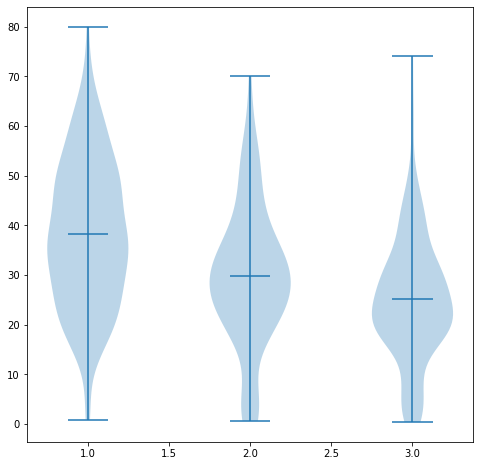

In [38]:
#Task 3.2
import matplotlib.pyplot as plt
print (db[(db['Pclass']==1)]['Age'].mean())
print (db[(db['Pclass']==2)]['Age'].mean())
print (db[(db['Pclass']==3)]['Age'].mean(), '\n')

db_n=db.dropna(subset='Age')
fir=np.array(db_n[(db_n['Pclass']==1)]['Age'].values)
sec=np.array(db_n[(db_n['Pclass']==2)]['Age'].values)
thir=np.array(db_n[(db_n['Pclass']==3)]['Age'].values)

print (sc.shapiro(fir))
print (sc.shapiro(sec))
print (sc.shapiro(thir), '\n' )

print (sc.kruskal(fir, sec, thir), '\n')

print (sc.ttest_ind(fir, sec, equal_var=False))
print (sc.ttest_ind(sec, thir, equal_var=False))
print (sc.ttest_ind(thir, fir, equal_var=False))

plt.figure(figsize=(8, 8))
data_plotter = [fir, sec, thir]
plt.violinplot(data_plotter, showmeans=True)
plt.show()


1) it seems that we can't consider these values to be equal. Looking at the plot, we can say that the mean of age per first class is very different from the mean of two other samples.  <br>
2) I check whether the samples are from the normal distribution. Shapiro test shows we can reject null hypothisys that the second and the third samples are normally distributed(for 2 and 3 p-value are more 0.05). The T-test is suitable for normal samples, but our are not. So we shouldn't use t-test to determine whether means of these samples are equal. Instead I used Kruskal-Wallis test and found out that means of our samples are equal.

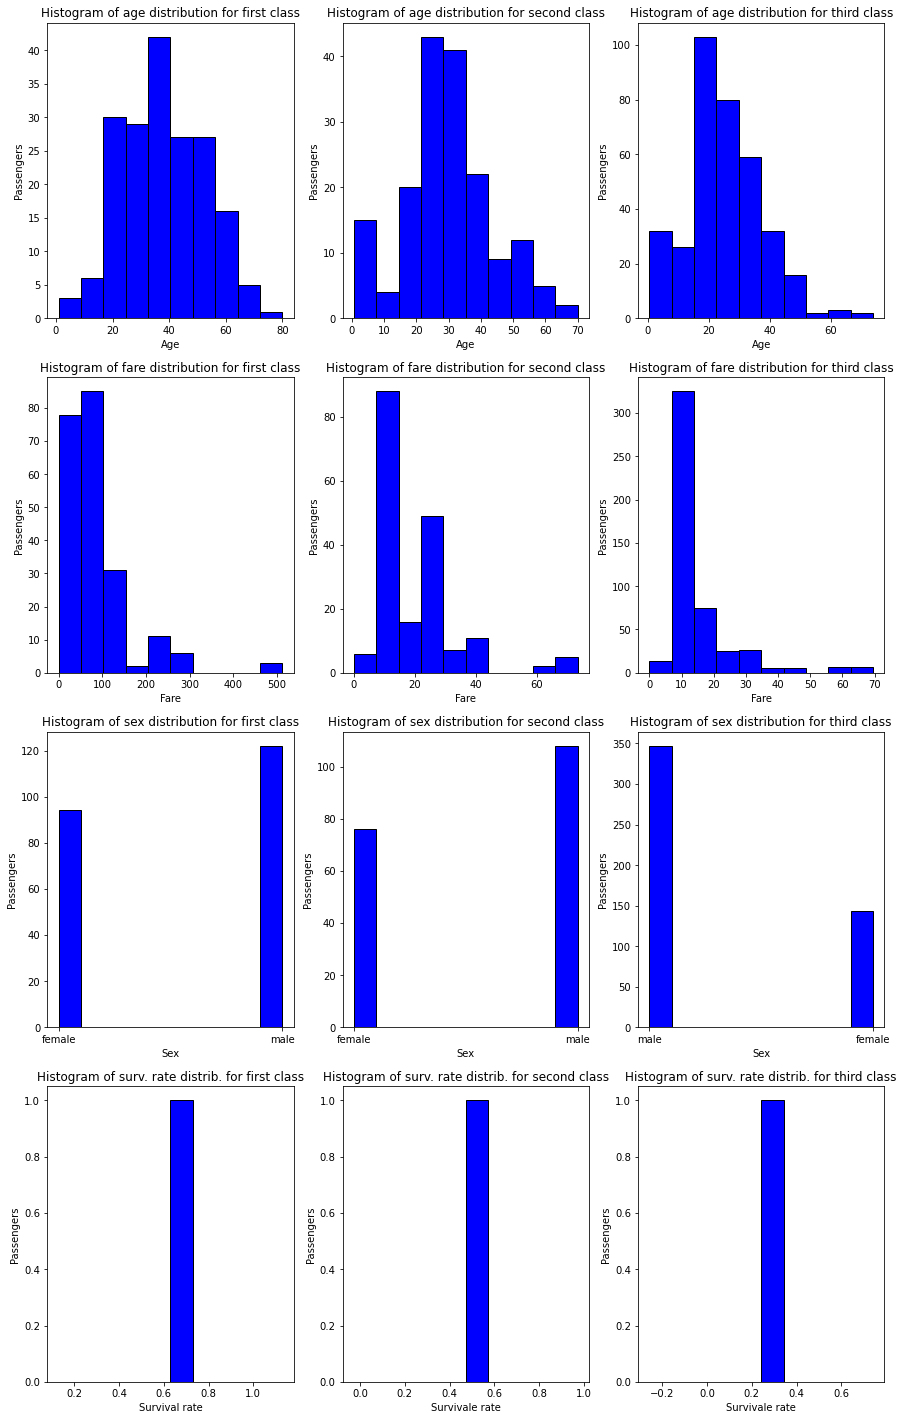

In [39]:
#Task 3.3
plt.figure(figsize=(15, 25))
ax = plt.subplot(4, 3, 1)

ax.hist(db[(db['Pclass']==1)]['Age'], color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of age distribution for first class')
ax.set_xlabel('Age', size = 10)
ax.set_ylabel('Passengers', size= 10)

ax = plt.subplot(4, 3, 2)
ax.hist(db[(db['Pclass']==2)]['Age'], color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of age distribution for second class')
ax.set_xlabel('Age', size = 10)
ax.set_ylabel('Passengers', size= 10)

ax = plt.subplot(4, 3, 3)
ax.hist(db[(db['Pclass']==3)]['Age'], color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of age distribution for third class')
ax.set_xlabel('Age', size = 10)
ax.set_ylabel('Passengers', size= 10)

ax = plt.subplot(4, 3, 4)
ax.hist(db[(db['Pclass']==1)]['Fare'], color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of fare distribution for first class')
ax.set_xlabel('Fare', size = 10)
ax.set_ylabel('Passengers', size= 10)

ax = plt.subplot(4, 3, 5)
ax.hist(db[(db['Pclass']==2)]['Fare'], color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of fare distribution for second class')
ax.set_xlabel('Fare', size = 10)
ax.set_ylabel('Passengers', size= 10)

ax = plt.subplot(4, 3, 6)
ax.hist(db[(db['Pclass']==3)]['Fare'], color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of fare distribution for third class')
ax.set_xlabel('Fare', size = 10)
ax.set_ylabel('Passengers', size= 10)

ax = plt.subplot(4, 3, 7)
ax.hist(db[(db['Pclass']==1)]['Sex'], color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of sex distribution for first class')
ax.set_xlabel('Sex', size = 10)
ax.set_ylabel('Passengers', size= 10)

ax = plt.subplot(4, 3, 8)
ax.hist(db[(db['Pclass']==2)]['Sex'], color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of sex distribution for second class')
ax.set_xlabel('Sex', size = 10)
ax.set_ylabel('Passengers', size= 10)

ax = plt.subplot(4, 3, 9)
ax.hist(db[(db['Pclass']==3)]['Sex'], color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of sex distribution for third class')
ax.set_xlabel('Sex', size = 10)
ax.set_ylabel('Passengers', size= 10)

ax = plt.subplot(4, 3, 10)
ax.hist(rate1, color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of surv. rate distrib. for first class')
ax.set_xlabel('Survival rate', size = 10)
ax.set_ylabel('Passengers', size= 10)

ax = plt.subplot(4, 3, 11)
ax.hist(rate2, color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of surv. rate distrib. for second class')
ax.set_xlabel('Survivale rate', size = 10)
ax.set_ylabel('Passengers', size= 10)

ax = plt.subplot(4, 3, 12)
ax.hist(rate3, color = 'blue', edgecolor = 'black')
ax.set_title('Histogram of surv. rate distrib. for third class')
ax.set_xlabel('Survivale rate', size = 10)
ax.set_ylabel('Passengers', size= 10)

plt.show()

In [40]:
#Task 3.4
print (db['Name'].apply(lambda a: a.split()[0]).value_counts().head(10))


Andersson,    9
Sage,         7
Goodwin,      6
Johnson,      6
Skoog,        6
Panula,       6
Carter,       6
Rice,         5
Fortune,      4
Asplund,      4
Name: Name, dtype: int64


Find 5 most common surnames: Andersson, Sage, Goodwin, Johnson, Skoog

#Task 3.5

1)The result isn't plausible, because we drop 80% of data. So we get the brand new data set. Amount of data has decreased and values from Task 1 (survival rates, the youngest passagers) commonly increase, the oldest passagers decrease. Plots were also changed. Proportion of records about first class passengers increased, records about passengers of other classes almost disappeared, but records about passengers of third class had been more than others before. Briefly values and plots much were changed.
<br>
2)Fill nan cell with mode (either mean or median, but I'm going to do with mode) of data in this column. Values from Task 1 (survival rates, the youngest and the oldest passagers) were hardly changed. The first plot was changed a lot, the others were not. So this method almost doesn't distort the statistics.
  
  Fill nan cell firstly with previous values and then with next values. Plots didn't change. But some values were changed, such as survival rates in age groups (they tend to be equal) and the oldest passengers in classes. So this method distort the statistics, but not so much.
  
  Fill nan cell 'Age', 'Pclass' by interpolation. Plots slightly changed, as well as the survival rates. So this method almost doesn't distort the statistics.
  
  Fill nan cell with a some value. For example, 0. 

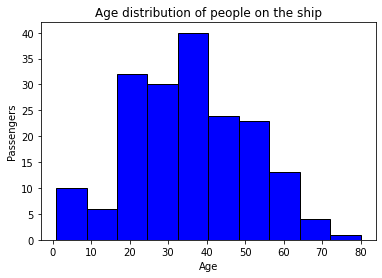

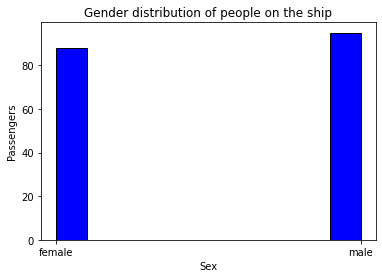

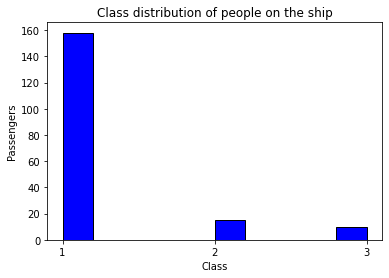

Age distribution mean:  35.6744262295082
Gender distribution mod:  male
Class distribution mod:  1 

Passangers are at age less than 18 years 19
Passangers are at age between 18 and 35 years 61
Passangers are at age between 35 and 60 years 81
Passangers are at age greater than 60 10 

Passenger belonging to each gender group: 
 male      95
female    88
Name: Sex, dtype: int64
Passenger belonging to each class group: 
 1    158
2     15
3     10
Name: Pclass, dtype: int64 

The youngest passager in first class 0.92
The youngest passager in second class 1.0
The youngest passager in third class 2.0 

The oldest passager in first class 80.0
The oldest passager in second class 57.0
The oldest passager in third class 42.0 

Survival rates in classes
The first: 0.6708860759493671
The second:  0.8
The third:  0.5 

Survival rates in gender groups
Male:  0.43157894736842106
Female:  0.9318181818181818 

Survival rates in age groups
Passengers are at age less than 18 years:  0.8947368421052632


In [41]:
db_new=db.dropna(axis=0).reset_index(drop = True)
ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Age'], color = 'blue', edgecolor = 'black')
ax.set_title('Age distribution of people on the ship')
ax.set_xlabel('Age', size = 10)
ax.set_ylabel('Passengers', size= 10)
plt.show()

ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Sex'], color = 'blue', edgecolor = 'black')
ax.set_title('Gender distribution of people on the ship')
ax.set_xlabel('Sex', size = 10)
ax.set_ylabel('Passengers', size= 10)
plt.show()

ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Pclass'], color = 'blue', edgecolor = 'black')
ax.set_title('Class distribution of people on the ship')
ax.set_xlabel('Class', size = 10)
ax.set_ylabel('Passengers', size= 10)
ax.set_xticks([1, 2, 3])
plt.show()

print ('Age distribution mean: ', db_new['Age'].mean()) 
print ('Gender distribution mod: ', db_new['Sex'].mode().iloc[0])
#So we find that male the most common Sex in our data
print ('Class distribution mod: ', db_new['Pclass'].mode().iloc[0], '\n')
#So we find that 3 the most common class in our data

print ('Passangers are at age less than 18 years', db_new[db_new['Age']<18].shape[0])
print ('Passangers are at age between 18 and 35 years',db_new[ (db_new['Age']>18) & (db_new['Age']<35)].shape[0])
print ('Passangers are at age between 35 and 60 years', db_new[ (db_new['Age']>35) & (db_new['Age']<60)].shape[0])
print ('Passangers are at age greater than 60', db_new[ (db_new['Age']>60)].shape[0], '\n')

print('Passenger belonging to each gender group:', '\n', db_new['Sex'].value_counts())
print('Passenger belonging to each class group:', '\n', db_new['Pclass'].value_counts(), '\n')

x=db_new[db_new['Pclass']==1]['Age'].idxmin()
print ('The youngest passager in first class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==2]['Age'].idxmin()
print ('The youngest passager in second class',db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==3]['Age'].idxmin()
print ('The youngest passager in third class', db_new[x:x+1]['Age'].iloc[0], '\n')

x=db_new[db_new['Pclass']==1]['Age'].idxmax()
print ('The oldest passager in first class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==2]['Age'].idxmax()
print ('The oldest passager in second class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==3]['Age'].idxmax()
print ('The oldest passager in third class', db_new[x:x+1]['Age'].iloc[0], '\n')
print ('Survival rates in classes')

surv=db_new[ (db_new['Pclass']==1) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==1)].shape[0]
rate1=surv/al
print ('The first:', rate1)

surv=db_new[ (db_new['Pclass']==2) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==2)].shape[0]
rate2=surv/al
print ('The second: ', rate2)

surv=db_new[ (db_new['Pclass']==3) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==3)].shape[0]
rate3=surv/al
print ('The third: ', rate3, '\n')

print ('Survival rates in gender groups')
       
surv=db_new[ (db_new['Sex']=='male') & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Sex']=='male')].shape[0]
rate=surv/al
print ('Male: ', rate)

surv=db_new[ (db_new['Sex']=='female') & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Sex']=='female')].shape[0]
rate=surv/al
print ('Female: ', rate, '\n')
       
print ('Survival rates in age groups')
surv=db_new[ (db_new['Age']<18) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']<18)].shape[0]
rate=surv/al
print ('Passengers are at age less than 18 years: ', rate)
surv=db_new[ (db_new['Age']>18) & (db_new['Age']<35) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>18) & (db_new['Age']<35)].shape[0]
rate=surv/al
print ('Passengers are at age between 18 and 35 years', rate)

surv=db_new[ (db_new['Age']>35) & (db_new['Age']<60) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>35) & (db_new['Age']<60)].shape[0]
rate=surv/al
print ('Passengers are at age between 35 and 60 years',rate)

surv=db_new[ (db_new['Age']>60) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>60)].shape[0]
rate=surv/al
print ('Passengers are at age greater than 60', rate)




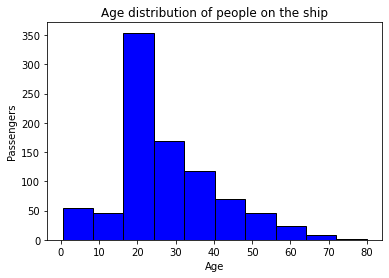

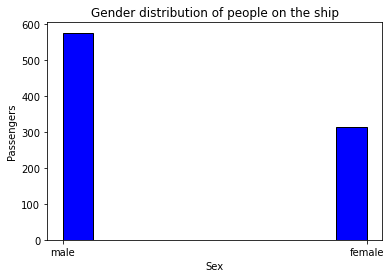

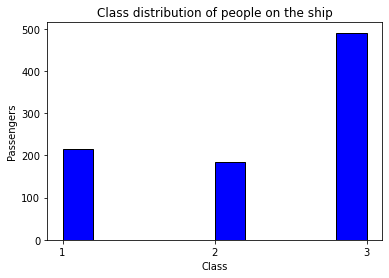

Age distribution mean:  28.566969696969696
Gender distribution mod:  male
Class distribution mod:  3 

Passangers are at age less than 18 years 113
Passangers are at age between 18 and 35 years 517
Passangers are at age between 35 and 60 years 191
Passangers are at age greater than 60 22 

Passenger belonging to each gender group: 
 male      577
female    314
Name: Sex, dtype: int64
Passenger belonging to each class group: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64 

The youngest passager in first class 0.92
The youngest passager in second class 0.67
The youngest passager in third class 0.42 

The oldest passager in first class 80.0
The oldest passager in second class 70.0
The oldest passager in third class 74.0 

Survival rates in classes
The first: 0.6296296296296297
The second:  0.47282608695652173
The third:  0.24236252545824846 

Survival rates in gender groups
Male:  0.18890814558058924
Female:  0.7420382165605095 

Survival rates in age groups
Passengers are at age

In [42]:
db_new=db.fillna(db.mode().iloc[0])

ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Age'], color = 'blue', edgecolor = 'black')
ax.set_title('Age distribution of people on the ship')
ax.set_xlabel('Age', size = 10)
ax.set_ylabel('Passengers', size= 10)
plt.show()

ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Sex'], color = 'blue', edgecolor = 'black')
ax.set_title('Gender distribution of people on the ship')
ax.set_xlabel('Sex', size = 10)
ax.set_ylabel('Passengers', size= 10)
plt.show()

ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Pclass'], color = 'blue', edgecolor = 'black')
ax.set_title('Class distribution of people on the ship')
ax.set_xlabel('Class', size = 10)
ax.set_ylabel('Passengers', size= 10)
ax.set_xticks([1, 2, 3])
plt.show()

print ('Age distribution mean: ', db_new['Age'].mean()) 
print ('Gender distribution mod: ', db_new['Sex'].mode().iloc[0])
#So we find that male the most common Sex in our data
print ('Class distribution mod: ', db_new['Pclass'].mode().iloc[0], '\n')
#So we find that 3 the most common class in our data

print ('Passangers are at age less than 18 years', db_new[db_new['Age']<18].shape[0])
print ('Passangers are at age between 18 and 35 years',db_new[ (db_new['Age']>18) & (db_new['Age']<35)].shape[0])
print ('Passangers are at age between 35 and 60 years', db_new[ (db_new['Age']>35) & (db_new['Age']<60)].shape[0])
print ('Passangers are at age greater than 60', db_new[ (db_new['Age']>60)].shape[0], '\n')

print('Passenger belonging to each gender group:', '\n', db_new['Sex'].value_counts())
print('Passenger belonging to each class group:', '\n', db_new['Pclass'].value_counts(), '\n')

x=db_new[db_new['Pclass']==1]['Age'].idxmin()
print ('The youngest passager in first class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==2]['Age'].idxmin()
print ('The youngest passager in second class',db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==3]['Age'].idxmin()
print ('The youngest passager in third class', db_new[x:x+1]['Age'].iloc[0], '\n')

x=db_new[db_new['Pclass']==1]['Age'].idxmax()
print ('The oldest passager in first class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==2]['Age'].idxmax()
print ('The oldest passager in second class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==3]['Age'].idxmax()
print ('The oldest passager in third class', db_new[x:x+1]['Age'].iloc[0], '\n')
print ('Survival rates in classes')

surv=db_new[ (db_new['Pclass']==1) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==1)].shape[0]
rate1=surv/al
print ('The first:', rate1)

surv=db_new[ (db_new['Pclass']==2) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==2)].shape[0]
rate2=surv/al
print ('The second: ', rate2)

surv=db_new[ (db_new['Pclass']==3) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==3)].shape[0]
rate3=surv/al
print ('The third: ', rate3, '\n')

print ('Survival rates in gender groups')
       
surv=db_new[ (db_new['Sex']=='male') & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Sex']=='male')].shape[0]
rate=surv/al
print ('Male: ', rate)

surv=db_new[ (db_new['Sex']=='female') & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Sex']=='female')].shape[0]
rate=surv/al
print ('Female: ', rate, '\n')
       
print ('Survival rates in age groups')

surv=db_new[ (db_new['Age']<18) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']<18)].shape[0]
rate=surv/al
print ('Passengers are at age less than 18 years: ', rate)

surv=db_new[ (db_new['Age']>18) & (db_new['Age']<35) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>18) & (db_new['Age']<35)].shape[0]
rate=surv/al
print ('Passengers are at age between 18 and 35 years', rate)

surv=db_new[ (db_new['Age']>35) & (db_new['Age']<60) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>35) & (db_new['Age']<60)].shape[0]
rate=surv/al
print ('Passengers are at age between 35 and 60 years',rate)

surv=db_new[ (db_new['Age']>60) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>60)].shape[0]
rate=surv/al
print ('Passengers are at age greater than 60', rate)


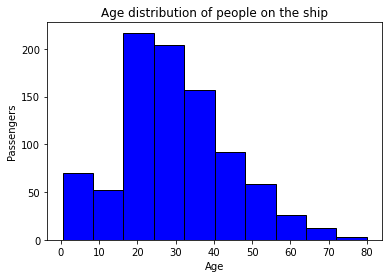

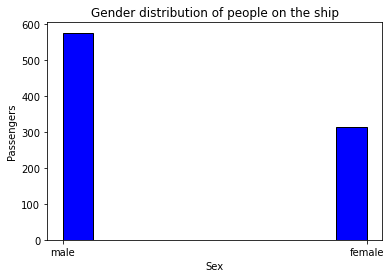

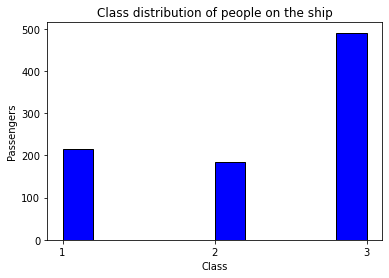

Age distribution mean:  29.87056116722783
Gender distribution mod:  male
Class distribution mod:  3 

Passangers are at age less than 18 years 138
Passangers are at age between 18 and 35 years 413
Passangers are at age between 35 and 60 years 247
Passangers are at age greater than 60 28 

Passenger belonging to each gender group: 
 male      577
female    314
Name: Sex, dtype: int64
Passenger belonging to each class group: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64 

The youngest passager in first class 0.92
The youngest passager in second class 0.67
The youngest passager in third class 0.42 

The oldest passager in first class 80.0
The oldest passager in second class 70.0
The oldest passager in third class 80.0 

Survival rates in classes
The first: 0.6296296296296297
The second:  0.47282608695652173
The third:  0.24236252545824846 

Survival rates in gender groups
Male:  0.18890814558058924
Female:  0.7420382165605095 

Survival rates in age groups
Passengers are at age 

In [43]:
db_new = db.fillna(method='bfill')
db_new = db_new.fillna(method='ffill')

ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Age'], color = 'blue', edgecolor = 'black')
ax.set_title('Age distribution of people on the ship')
ax.set_xlabel('Age', size = 10)
ax.set_ylabel('Passengers', size= 10)
plt.show()

ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Sex'], color = 'blue', edgecolor = 'black')
ax.set_title('Gender distribution of people on the ship')
ax.set_xlabel('Sex', size = 10)
ax.set_ylabel('Passengers', size= 10)
plt.show()

ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Pclass'], color = 'blue', edgecolor = 'black')
ax.set_title('Class distribution of people on the ship')
ax.set_xlabel('Class', size = 10)
ax.set_ylabel('Passengers', size= 10)
ax.set_xticks([1, 2, 3])
plt.show()

print ('Age distribution mean: ', db_new['Age'].mean()) 
print ('Gender distribution mod: ', db_new['Sex'].mode().iloc[0])
#So we find that male the most common Sex in our data
print ('Class distribution mod: ', db_new['Pclass'].mode().iloc[0], '\n')
#So we find that 3 the most common class in our data

print ('Passangers are at age less than 18 years', db_new[db_new['Age']<18].shape[0])
print ('Passangers are at age between 18 and 35 years',db_new[ (db_new['Age']>18) & (db_new['Age']<35)].shape[0])
print ('Passangers are at age between 35 and 60 years', db_new[ (db_new['Age']>35) & (db_new['Age']<60)].shape[0])
print ('Passangers are at age greater than 60', db_new[ (db_new['Age']>60)].shape[0], '\n')

print('Passenger belonging to each gender group:', '\n', db_new['Sex'].value_counts())
print('Passenger belonging to each class group:', '\n', db_new['Pclass'].value_counts(), '\n')

x=db_new[db_new['Pclass']==1]['Age'].idxmin()
print ('The youngest passager in first class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==2]['Age'].idxmin()
print ('The youngest passager in second class',db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==3]['Age'].idxmin()
print ('The youngest passager in third class', db_new[x:x+1]['Age'].iloc[0], '\n')

x=db_new[db_new['Pclass']==1]['Age'].idxmax()
print ('The oldest passager in first class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==2]['Age'].idxmax()
print ('The oldest passager in second class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==3]['Age'].idxmax()
print ('The oldest passager in third class', db_new[x:x+1]['Age'].iloc[0], '\n')
print ('Survival rates in classes')

surv=db_new[ (db_new['Pclass']==1) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==1)].shape[0]
rate1=surv/al
print ('The first:', rate1)

surv=db_new[ (db_new['Pclass']==2) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==2)].shape[0]
rate2=surv/al
print ('The second: ', rate2)

surv=db_new[ (db_new['Pclass']==3) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==3)].shape[0]
rate3=surv/al
print ('The third: ', rate3, '\n')

print ('Survival rates in gender groups')
       
surv=db_new[ (db_new['Sex']=='male') & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Sex']=='male')].shape[0]
rate=surv/al
print ('Male: ', rate)

surv=db_new[ (db_new['Sex']=='female') & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Sex']=='female')].shape[0]
rate=surv/al
print ('Female: ', rate, '\n')
       
print ('Survival rates in age groups')

surv=db_new[ (db_new['Age']<18) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']<18)].shape[0]
rate=surv/al
print ('Passengers are at age less than 18 years: ', rate)

surv=db_new[ (db_new['Age']>18) & (db_new['Age']<35) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>18) & (db_new['Age']<35)].shape[0]
rate=surv/al
print ('Passengers are at age between 18 and 35 years', rate)

surv=db_new[ (db_new['Age']>35) & (db_new['Age']<60) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>35) & (db_new['Age']<60)].shape[0]
rate=surv/al
print ('Passengers are at age between 35 and 60 years',rate)

surv=db_new[ (db_new['Age']>60) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>60)].shape[0]
rate=surv/al
print ('Passengers are at age greater than 60', rate)




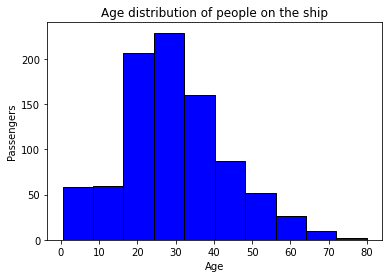

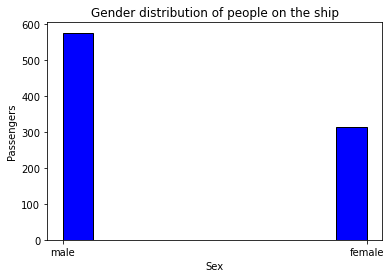

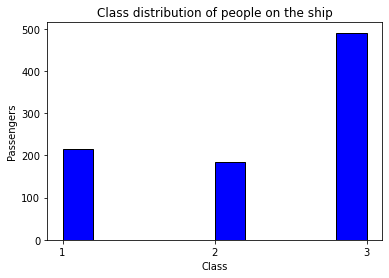

Age distribution mean:  29.726060606060603
Gender distribution mod:  male
Class distribution mod:  3 

Passangers are at age less than 18 years 136
Passangers are at age between 18 and 35 years 436
Passangers are at age between 35 and 60 years 244
Passangers are at age greater than 60 23 

Passenger belonging to each gender group: 
 male      577
female    314
Name: Sex, dtype: int64
Passenger belonging to each class group: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64 

The youngest passager in first class 0.92
The youngest passager in second class 0.67
The youngest passager in third class 0.42 

The oldest passager in first class 80.0
The oldest passager in second class 70.0
The oldest passager in third class 74.0 

Survival rates in classes
The first: 0.6296296296296297
The second:  0.47282608695652173
The third:  0.24236252545824846 

Survival rates in gender groups
Male:  0.18890814558058924
Female:  0.7420382165605095 

Survival rates in age groups
Passengers are at age

In [44]:
db_new = db.interpolate(method='linear')

ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Age'], color = 'blue', edgecolor = 'black')
ax.set_title('Age distribution of people on the ship')
ax.set_xlabel('Age', size = 10)
ax.set_ylabel('Passengers', size= 10)
plt.show()

ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Sex'], color = 'blue', edgecolor = 'black')
ax.set_title('Gender distribution of people on the ship')
ax.set_xlabel('Sex', size = 10)
ax.set_ylabel('Passengers', size= 10)
plt.show()

ax = plt.subplot(1, 1, 1)
ax.hist(db_new['Pclass'], color = 'blue', edgecolor = 'black')
ax.set_title('Class distribution of people on the ship')
ax.set_xlabel('Class', size = 10)
ax.set_ylabel('Passengers', size= 10)
ax.set_xticks([1, 2, 3])
plt.show()

print ('Age distribution mean: ', db_new['Age'].mean()) 
print ('Gender distribution mod: ', db_new['Sex'].mode().iloc[0])
#So we find that male the most common Sex in our data
print ('Class distribution mod: ', db_new['Pclass'].mode().iloc[0], '\n')
#So we find that 3 the most common class in our data

print ('Passangers are at age less than 18 years', db_new[db_new['Age']<18].shape[0])
print ('Passangers are at age between 18 and 35 years',db_new[ (db_new['Age']>18) & (db_new['Age']<35)].shape[0])
print ('Passangers are at age between 35 and 60 years', db_new[ (db_new['Age']>35) & (db_new['Age']<60)].shape[0])
print ('Passangers are at age greater than 60', db_new[ (db_new['Age']>60)].shape[0], '\n')

print('Passenger belonging to each gender group:', '\n', db_new['Sex'].value_counts())
print('Passenger belonging to each class group:', '\n', db_new['Pclass'].value_counts(), '\n')

x=db_new[db_new['Pclass']==1]['Age'].idxmin()
print ('The youngest passager in first class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==2]['Age'].idxmin()
print ('The youngest passager in second class',db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==3]['Age'].idxmin()
print ('The youngest passager in third class', db_new[x:x+1]['Age'].iloc[0], '\n')

x=db_new[db_new['Pclass']==1]['Age'].idxmax()
print ('The oldest passager in first class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==2]['Age'].idxmax()
print ('The oldest passager in second class', db_new[x:x+1]['Age'].iloc[0])
x=db_new[db_new['Pclass']==3]['Age'].idxmax()
print ('The oldest passager in third class', db_new[x:x+1]['Age'].iloc[0], '\n')
print ('Survival rates in classes')

surv=db_new[ (db_new['Pclass']==1) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==1)].shape[0]
rate1=surv/al
print ('The first:', rate1)

surv=db_new[ (db_new['Pclass']==2) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==2)].shape[0]
rate2=surv/al
print ('The second: ', rate2)

surv=db_new[ (db_new['Pclass']==3) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Pclass']==3)].shape[0]
rate3=surv/al
print ('The third: ', rate3, '\n')

print ('Survival rates in gender groups')
       
surv=db_new[ (db_new['Sex']=='male') & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Sex']=='male')].shape[0]
rate=surv/al
print ('Male: ', rate)

surv=db_new[ (db_new['Sex']=='female') & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Sex']=='female')].shape[0]
rate=surv/al
print ('Female: ', rate, '\n')
       
print ('Survival rates in age groups')

surv=db_new[ (db_new['Age']<18) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']<18)].shape[0]
rate=surv/al
print ('Passengers are at age less than 18 years: ', rate)

surv=db_new[ (db_new['Age']>18) & (db_new['Age']<35) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>18) & (db_new['Age']<35)].shape[0]
rate=surv/al
print ('Passengers are at age between 18 and 35 years', rate)

surv=db_new[ (db_new['Age']>35) & (db_new['Age']<60) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>35) & (db_new['Age']<60)].shape[0]
rate=surv/al
print ('Passengers are at age between 35 and 60 years',rate)

surv=db_new[ (db_new['Age']>60) & (db_new['Survived']==1 )].shape[0]
al=db_new[ (db_new['Age']>60)].shape[0]
rate=surv/al
print ('Passengers are at age greater than 60', rate)
